In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
#labeling function for binary class labels
def percent_to_label_binaryclass(p):
    if p >= 80: #normal
        return 0
    elif p < 80: #not normal
        return 1

In [7]:
#labeling function for multiclass labels
def percent_to_label_multiclass(p):
    if p >= 80: #normal
        return 0
    elif 60 <= p < 80: #mild
        return 1
    elif 50 <= p < 60: #moderate
        return 2
    else:
        return 3 #severe

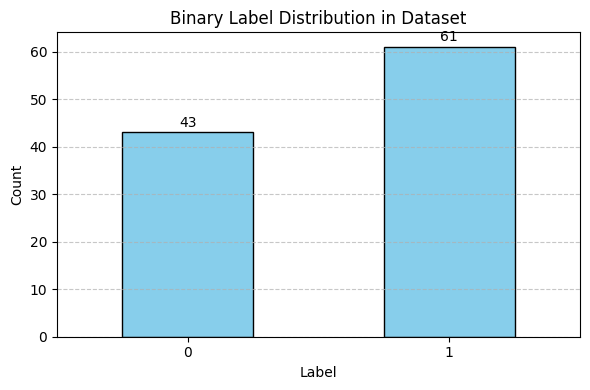

In [11]:
#binary data analysis

# Count each label type
# Load the dataset
binary_df = pd.read_csv('dataset/labels_binary.csv')
label_counts = binary_df['label'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add count labels on top of each bar
for i, count in enumerate(label_counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Binary Label Distribution in Dataset')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

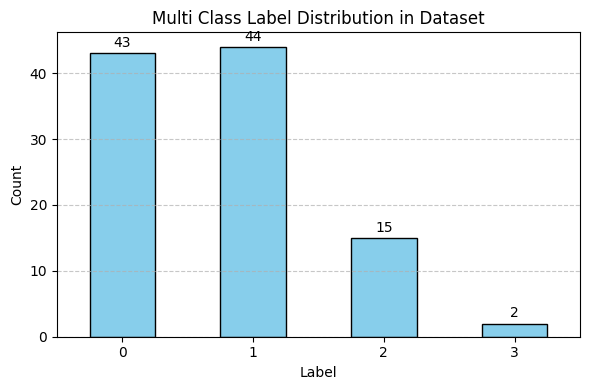

In [12]:
#multi class data analysis

# Count each label type
# Load the dataset
multi_df = pd.read_csv('dataset/labels_multi.csv')
label_counts = multi_df['label'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add count labels on top of each bar
for i, count in enumerate(label_counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Multi Class Label Distribution in Dataset')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()